<a href="https://colab.research.google.com/github/RajaSubramanian10/Realtime-classification-of-Cricket-Bowlers/blob/main/kNN_Classifier_for_Bowler_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**kNN Classifier for Bowler Classification
@Author: Mr. R. Raja Subramanian**

In [ ]:
# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Winner','Span','Mat','Inns','Balls','Runs','Wkts','BBI','BBM','Ave','Econ','SR','5','10','']
  
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  with open("ESPNcricBowltats.csv", 'a') as csvfile:  
      # creating a csv writer object  
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)
 
 
url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;"
url2 = ""
url3 = "template=results;type=bowling"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,36):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=2;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=3;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=4;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=5;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=6;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=7;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=8;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=9;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=10;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read the dataset
data = pd.read_csv("ESPNcricBowltats.csv")
print(data.head())
 
# Preprocess
def discretizeOutput(y):
  for i in range(len(y)):
    if(y[i]<65):
      y[i] = 1
    else:
      y[i] = 0
  return y
"""def preprocessBBI(x1):
  for i in range(len(x1)):
    c=x1[i].split("/")
    x1[i] = int(c[0])/int(c[1])
    return x1
"""
# Separate features and target
y = data["SR"]
#x1 = data["BBI"]
#preprocessBBI(x1) 
discretizeOutput(y)



                   Winner       Span  Mat  Inns  Balls   Runs  Wkts    BBI  \
0  M Muralidaran (ICC/SL)  1992-2010  133   230  44039  18180   800   9/51   
1          SK Warne (AUS)  1992-2007  145   273  40705  17995   708   8/71   
2       JM Anderson (ENG)  2003-2022  172   320  37077  17325   657   7/42   
3        A Kumble (INDIA)  1990-2008  132   236  40850  18355   619  10/74   
4        GD McGrath (AUS)  1993-2007  124   243  29248  12186   563   8/24   

      BBM    Ave  Econ    SR   5  10  Unnamed: 14  
0  16/220  22.72  2.47  55.0  67  22          NaN  
1  12/128  25.41  2.65  57.4  37  10          NaN  
2   11/71  26.36  2.80  56.4  32   3          NaN  
3  14/149  29.65  2.69  65.9  35   8          NaN  
4   10/27  21.64  2.49  51.9  29   3          NaN  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1745    0.0
1746    0.0
1747    0.0
1748    0.0
1749    0.0
Name: SR, Length: 1750, dtype: float64

In [ ]:
data

,Winner,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10,Unnamed: 14
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,18180,800,9/51,16/220,22.72,2.47,1.0,67,22,NaN
1,SK Warne (AUS),1992-2007,145,273,40705,17995,708,8/71,12/128,25.41,2.65,1.0,37,10,NaN
2,JM Anderson (ENG),2003-2022,172,320,37077,17325,657,7/42,11/71,26.36,2.80,1.0,32,3,NaN
3,A Kumble (INDIA),1990-2008,132,236,40850,18355,619,10/74,14/149,29.65,2.69,0.0,35,8,NaN
4,GD McGrath (AUS),1993-2007,124,243,29248,12186,563,8/24,10/27,21.64,2.49,1.0,29,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,J O'Connor (ENG),1929-1930,4,4,162,72,1,1/31,1/31,72.00,2.66,0.0,0,0,NaN
1746,AH Omarshah (ZIM),1992-1996,3,3,186,125,1,1/46,1/82,125.00,4.03,0.0,0,0,NaN
1747,JL Ontong (SA),2002-2004,2,3,185,133,1,1/79,1/123,133.00,4.31,0.0,0,0,NaN
1748,AL Padmore (WI),1976-1976,2,3,474,135,1,1/36,1/134,135.00,1.70,0.0,0,0,NaN


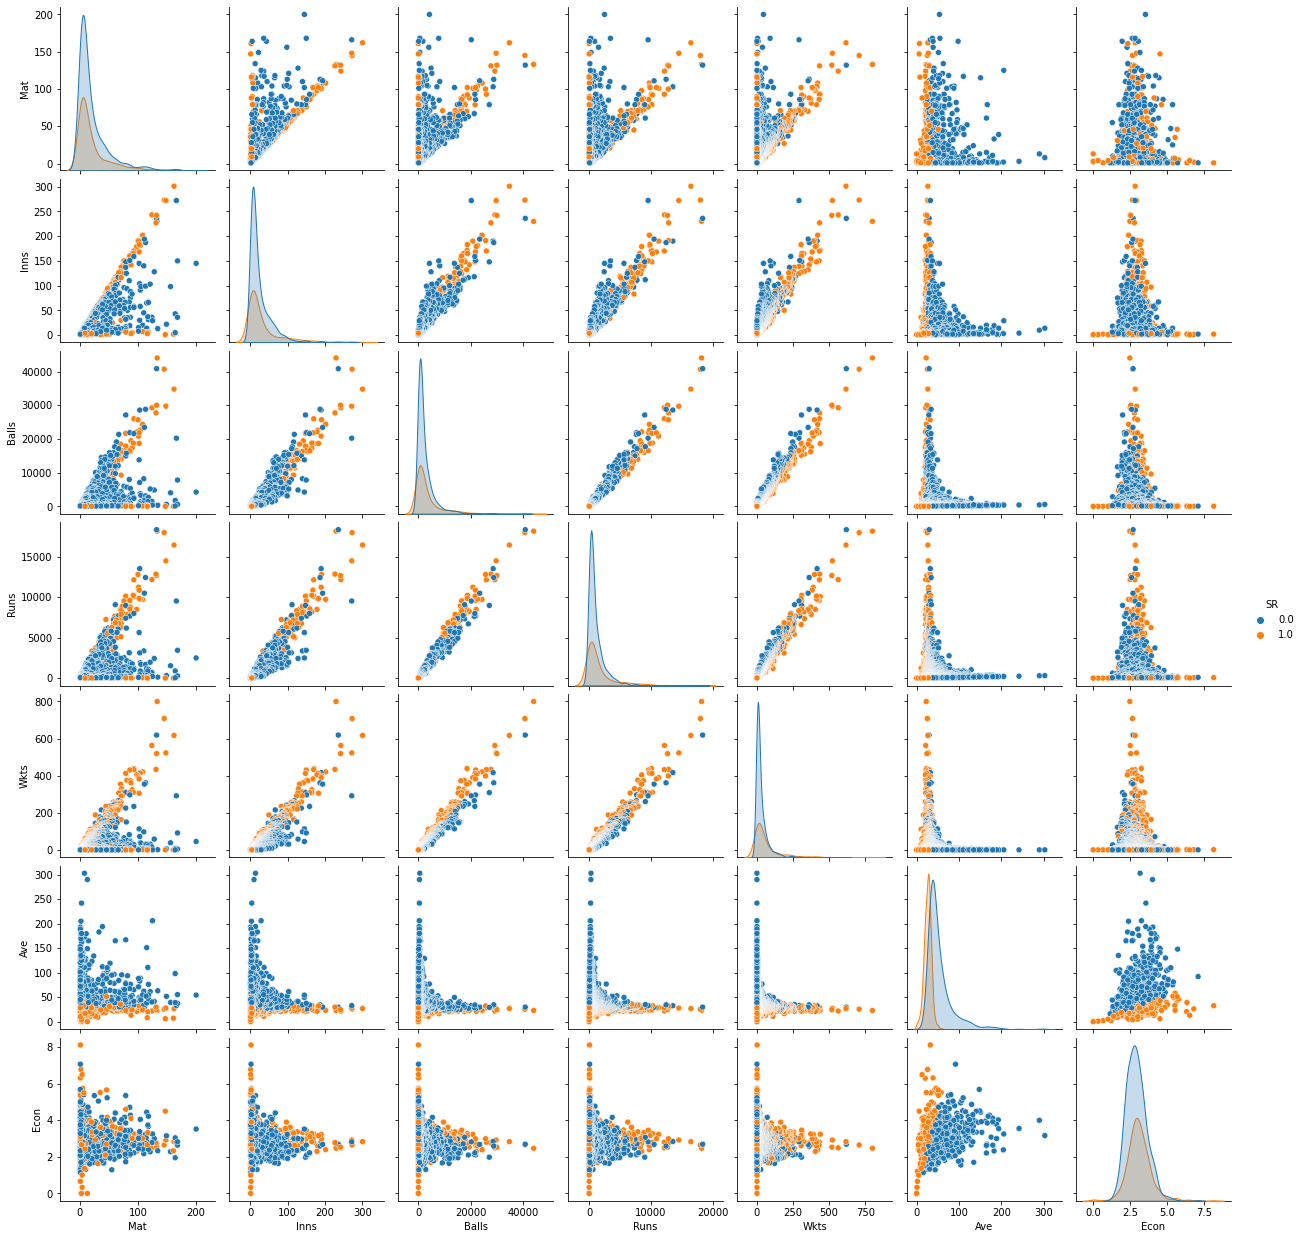

In [ ]:
import seaborn as sns

df = pd.DataFrame(data, columns=data.columns[1:12])
sns.pairplot(df,hue='SR')

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['Ave','Econ']]
X_train, X_test, y_train, y_test = train_test_split(x,df['SR'],test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[343   6]
 [  9 167]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       349
         1.0       0.97      0.95      0.96       176

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
def PrecisionRecallCurve(xtest, y_test, y_pred, classifier):
  average_precision = average_precision_score(y_test, y_pred)
  print('Average precision-recall score: {0:0.2f}'.format(average_precision)) 
  disp = plot_precision_recall_curve(classifier, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Average precision-recall score: 0.93


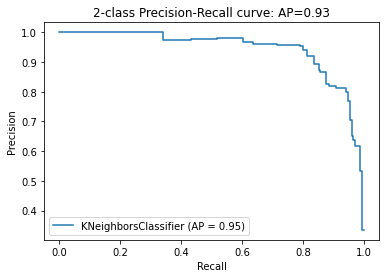

In [ ]:
PrecisionRecallCurve(X_test,y_test,pred,knn)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
error_rate = []

# Will take some time
for i in range(1,42):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

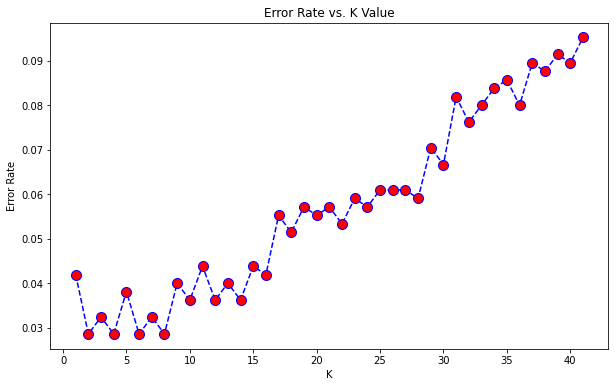

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(range(1,42),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')